### Imports

In [40]:
# Instalação do Seaborn

!pip install seaborn

In [41]:
# Biliotecas úteis no tratamento e exibição dos dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas úteis para o tratamento de dados, treinamento e avaliação dos modelos.
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#Bibliotecas específicas para cada modelo utilizado

#DecesionTree
from sklearn.tree import DecisionTreeClassifier

#SVC
from sklearn.svm import SVC

#KNC
from sklearn.neighbors import KNeighborsClassifier

### Preparação dos dados

#### Visualização dos dados

In [42]:
#Primeiro, vamos abrir o arquivo CSV
df = pd.read_csv("pulsar_data_train.csv")

# Vamos analisar as primeiras 10 linhas
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [43]:
# Exibindo a correlação entre os dados, apenas para fins de curiosidade.
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.872595,-0.737598,-0.298123,-0.313845,0.235781,0.146782,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.527779,-0.539896,-0.001656,-0.058241,0.031671,0.028757,-0.365757
Excess kurtosis of the integrated profile,-0.872595,-0.527779,1.000000,0.944648,0.414739,0.439037,-0.341394,-0.214991,0.791661
Skewness of the integrated profile,-0.737598,-0.539896,0.944648,1.000000,0.412659,0.420058,-0.328675,-0.204148,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.414739,0.412659,1.000000,0.797974,-0.616385,-0.353898,0.400375
Standard deviation of the DM-SNR curve,-0.313845,-0.058241,0.439037,0.420058,0.797974,1.000000,-0.808061,-0.574594,0.497210
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.341394,-0.328675,-0.616385,-0.808061,1.000000,0.924264,-0.389788
Skewness of the DM-SNR curve,0.146782,0.028757,-0.214991,-0.204148,-0.353898,-0.574594,0.924264,1.000000,-0.259065
target_class,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


#### Tratamento e divisão dos dados

In [44]:
# Removendo valores NaN (Not a Number) do dataset, para evitar erros nos treinamentos dos modelos
df.dropna(inplace=True)

In [45]:
# Definindo o X (input) e y (output) para o treinamento dos modelos. O 'X' considera todo o dataset, exceto pela coluna 'target_class', enquanto o 'y' é justamente a
# coluna 'target_class', que é o que pretendemos adivinhar com os modelos de machine learning.
 
X = df.drop("target_class",axis=1)
y = df["target_class"]

In [46]:
'''
Dividindo o conjunto de dados para treinamento e teste. Os dados de treinamento, como o nome sugere, são utilizados para treinar o modelo, enquanto os dados de
teste são utilizados para avaliar o modelo.

Parâmetros: 

- random_state: Um valor específico para garantir a reprodutibilidade da divisão do conjunto de dados. Se você fornecer o mesmo valor em execuções diferentes,
a divisão será sempre a mesma. Isso é útil para resultados consistentes em diferentes execuções do código. O valor exato escolhido não importa, contanto que
seja o mesmo sempre que você executar o código.

- test_size: Define a proporção de dados para treino e teste. Nesse caso, será utilizado 70% para treino e 30% para teste.

- shuffle: Indica se os dados devem ser embaralhados antes da divisão. Se shuffle=True, os dados serão embaralhados aleatoriamente antes de dividir,
garantindo uma distribuição aleatória entre os conjuntos de treinamento e teste.

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.3, shuffle=True)

In [47]:
# Padronizando os dados
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### SVC

In [48]:
# Definindo um dataframe para exibir posteriorment os resultados
result = pd.DataFrame(columns=["Kernel", "Regularisation", "Accuracy", "Precision", "Recall", "F1 Score"])

In [67]:
'''
Definição de valores para regularizações (penalidades para coeficientes) e kernels (funções de similaridade).

-Regularizações: controlam a complexidade do modelo e previnem sobreajuste.

-Kernels: afetam como o SVM realiza a classificação, com opções como polinomial, gaussiano, sigmoide e linear.
'''

regularisations = [0.1, 1, 10, 100]
kernels = ["poly", "rbf"]

In [68]:
# Iteração sobre diferentes regularizações e kernels
for c in regularisations :
    for k in kernels : 
        # Verifica se o kernel é polinomial
        if k == "poly" :
            # Loop para diferentes graus do kernel polinomial
            for d in range(2) :
                # Criação de um modelo SVM com os parâmetros especificados
                svc = SVC(C = c, kernel = k, degree = d+1)
                # Treinamento do modelo no conjunto de treinamento
                svc.fit(X_train, y_train)
                # Predição no conjunto de teste
                y_pred = svc.predict(X_test)
                
                # Avaliação do desempenho do modelo
                acc = accuracy_score(y_test, y_pred)
                pre = precision_score(y_test, y_pred)
                rec = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                
                # Criação de um novo registro para o DataFrame de resultados
                new_row = {'Kernel': k + "-" + str(d+1), 'Regularisation': c, 'Accuracy': acc, 
                           'Precision': pre, 'Recall': rec, 'F1 Score': f1}
                # Atualização do DataFrame de resultados
                result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)
            
        else :
            # Criação de um modelo SVM com os parâmetros especificados
            svc = SVC(C = c, kernel = k)
            # Treinamento do modelo no conjunto de treinamento
            svc.fit(X_train, y_train)
            # Predição no conjunto de teste
            y_pred = svc.predict(X_test)
            
            # Avaliação do desempenho do modelo
            acc = accuracy_score(y_test, y_pred)
            pre = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            # Criação de um novo registro para o DataFrame de resultados
            new_row = {'Kernel': k, 'Regularisation': c, 'Accuracy': acc, 
                       'Precision': pre, 'Recall': rec, 'F1 Score': f1}
            # Atualização do DataFrame de resultados
            result_df = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)


In [64]:
# Mostrando o resultado obtido para as diferentes combinações de parâmetros
result

,Kernel,Regularisation,Accuracy,Precision,Recall,F1 Score
0,poly-1,0.1,0.975917,0.959799,0.764,0.85078
1,poly-2,0.1,0.970884,0.977401,0.692,0.810304
2,poly-1,0.1,0.975917,0.959799,0.764,0.85078
3,poly-2,0.1,0.970884,0.977401,0.692,0.810304
4,poly-1,1,0.978792,0.956938,0.8,0.87146
5,poly-2,1,0.974119,0.978495,0.728,0.834862
6,poly-1,10,0.98059,0.949541,0.828,0.884615
7,poly-2,10,0.974119,0.945,0.756,0.84
8,poly-1,50,0.98023,0.949309,0.824,0.882227
9,poly-2,50,0.976276,0.942308,0.784,0.855895


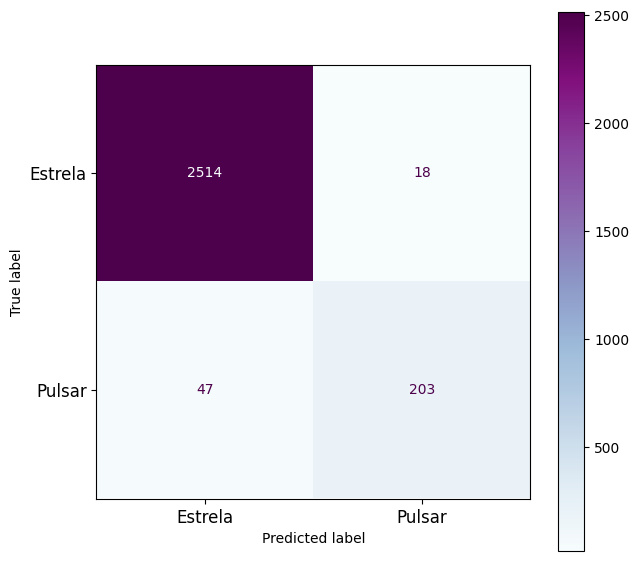

In [69]:
#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=12)

### KNN

In [70]:
# Treinamento do Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Escolha o número adequado de vizinhos
knn_model.fit(X_train, y_train)

# Avaliação do Modelo
knn_y_pred = knn_model.predict(X_test)

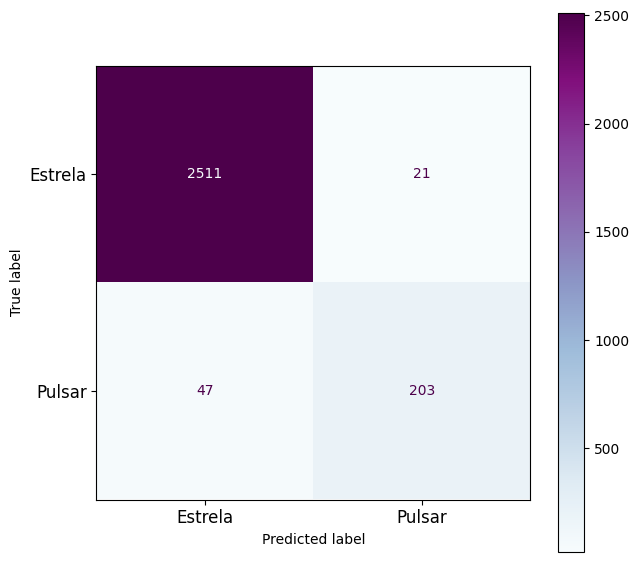

In [71]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Estrela', 'Pulsar'], yticklabels=['Estrela', 'Pulsar'])
# plt.xlabel('Predito')
# plt.ylabel('Real')
# plt.title('Matriz de Confusão')
# plt.show()

#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred , labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=12)


### Random Forest Tree

In [72]:
# Transformando as classes em números
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

In [73]:
'''
- Splitter: "best" indica que utilizaremos a melhor separação possível para os dados

- Criterion: "entropy" indica que a árvore irá buscar ter sempre apenas uma classe dentro de cada folha
de forma que isso indicaria uma entropia igual a 0

- max_depth:  é um dos critérios para evitar overfitting, ele exige que a árvore tenha no máximo 4 profundidades
'''

dtc = DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 4)

# Treinando as Árvores de Decisão
dtc = dtc.fit(X_train, y_train)

# Fazendo as previsões utilizando o nosso conjunto teste
dt_y_pred = dtc.predict(X_test)


              precision    recall  f1-score   support

     Estrela       0.98      0.98      0.98      2532
      Pulsar       0.83      0.85      0.84       250

    accuracy                           0.97      2782
   macro avg       0.91      0.92      0.91      2782
weighted avg       0.97      0.97      0.97      2782



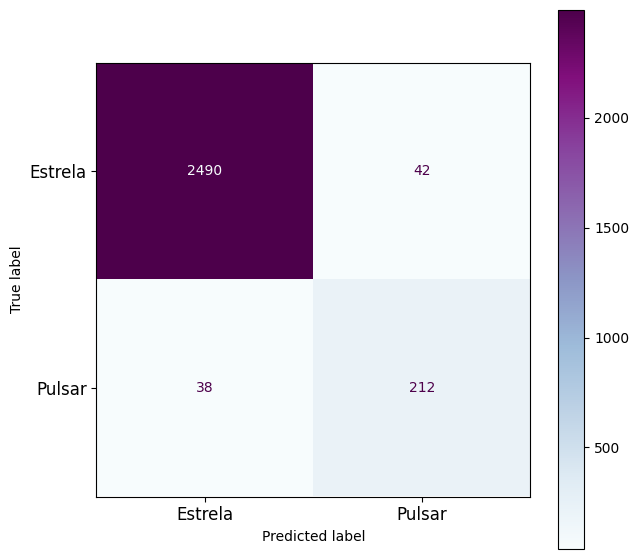

In [74]:
#Código para o Classification Report, onde conseguimos ver a capacidade de classificação do modelo em cada caso
print(classification_report(y_test, dt_y_pred, labels=[0,1], target_names=['Estrela', 'Pulsar']))


# Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)

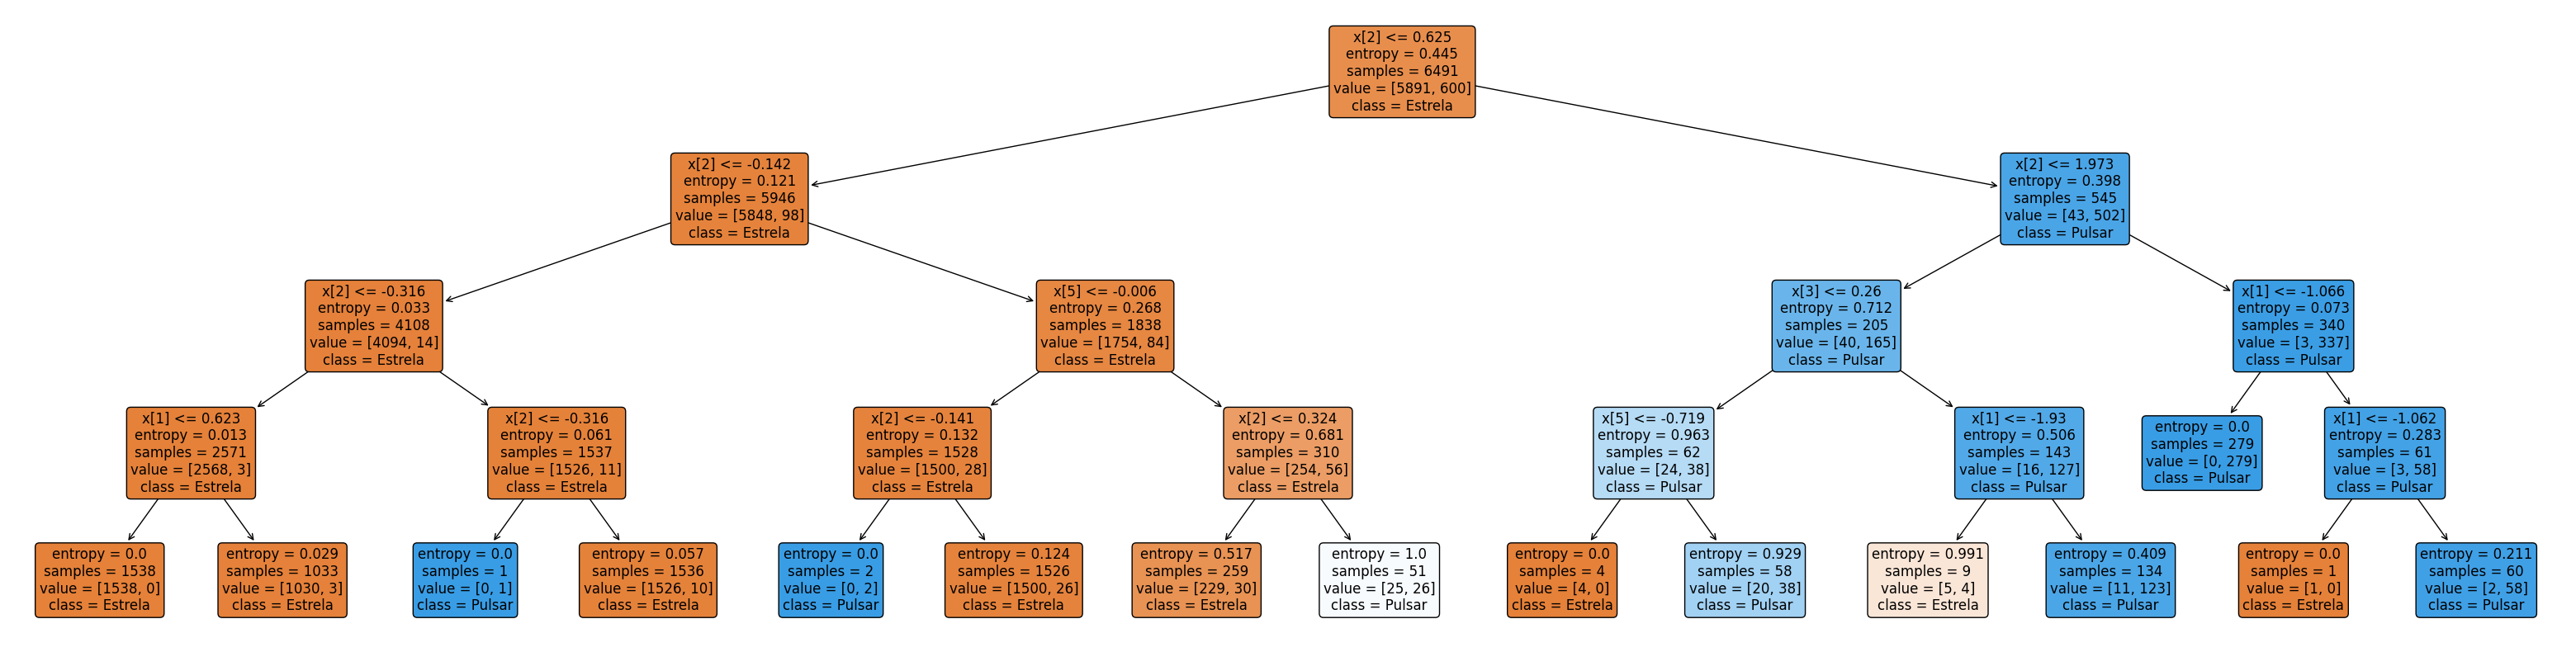

In [75]:
#Código para plotar a árvore

from sklearn.tree import plot_tree

plt.figure(figsize=(40, 10))
plot_tree(
    dtc,
    filled=True,
    class_names=["Estrela", "Pulsar"],
    rounded=True,
    fontsize = 12
)
plt.show()